**Import Necessary Libraries**

In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import warnings
import tensorflow as tf
from matplotlib import pylab as plt
from IPython.core.interactiveshell import InteractiveShell
from sklearn.metrics import confusion_matrix

warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=Warning)
InteractiveShell.ast_node_interactivity = 'all'

%reload_ext autoreload
%autoreload 2

sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1.5)
plt.style.use('fivethirtyeight')
pd.set_option("display.width", 100)
pd.set_option("display.max_columns", 25)
pd.set_option("display.max_rows", 25)

print(tf.__version__)
print("Setup complete!")

2.8.0
Setup complete!


**Read in updated DataFrame**

In [2]:
raw = "/content/drive/MyDrive/AI/diabetes_data.csv"
diabetes_data = pd.read_csv(raw, sep=";")
diabetes_data

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,Female,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,Female,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,Female,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [3]:
# getting the information 
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 520 non-null    int64 
 1   gender              520 non-null    object
 2   polyuria            520 non-null    int64 
 3   polydipsia          520 non-null    int64 
 4   sudden_weight_loss  520 non-null    int64 
 5   weakness            520 non-null    int64 
 6   polyphagia          520 non-null    int64 
 7   genital_thrush      520 non-null    int64 
 8   visual_blurring     520 non-null    int64 
 9   itching             520 non-null    int64 
 10  irritability        520 non-null    int64 
 11  delayed_healing     520 non-null    int64 
 12  partial_paresis     520 non-null    int64 
 13  muscle_stiffness    520 non-null    int64 
 14  alopecia            520 non-null    int64 
 15  obesity             520 non-null    int64 
 16  class               520 no

In [4]:
# Getting the uniqueness categorical variable
categorical = diabetes_data.select_dtypes(["category", "object"]).columns
for cat_col in categorical:
    print(f"{cat_col} : {diabetes_data[cat_col].nunique()} unique values(s)")

gender : 2 unique values(s)


In [5]:
diabetes_data["gender"] = diabetes_data["gender"].apply({"Male":1, "Female":0}.get)
diabetes_data.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


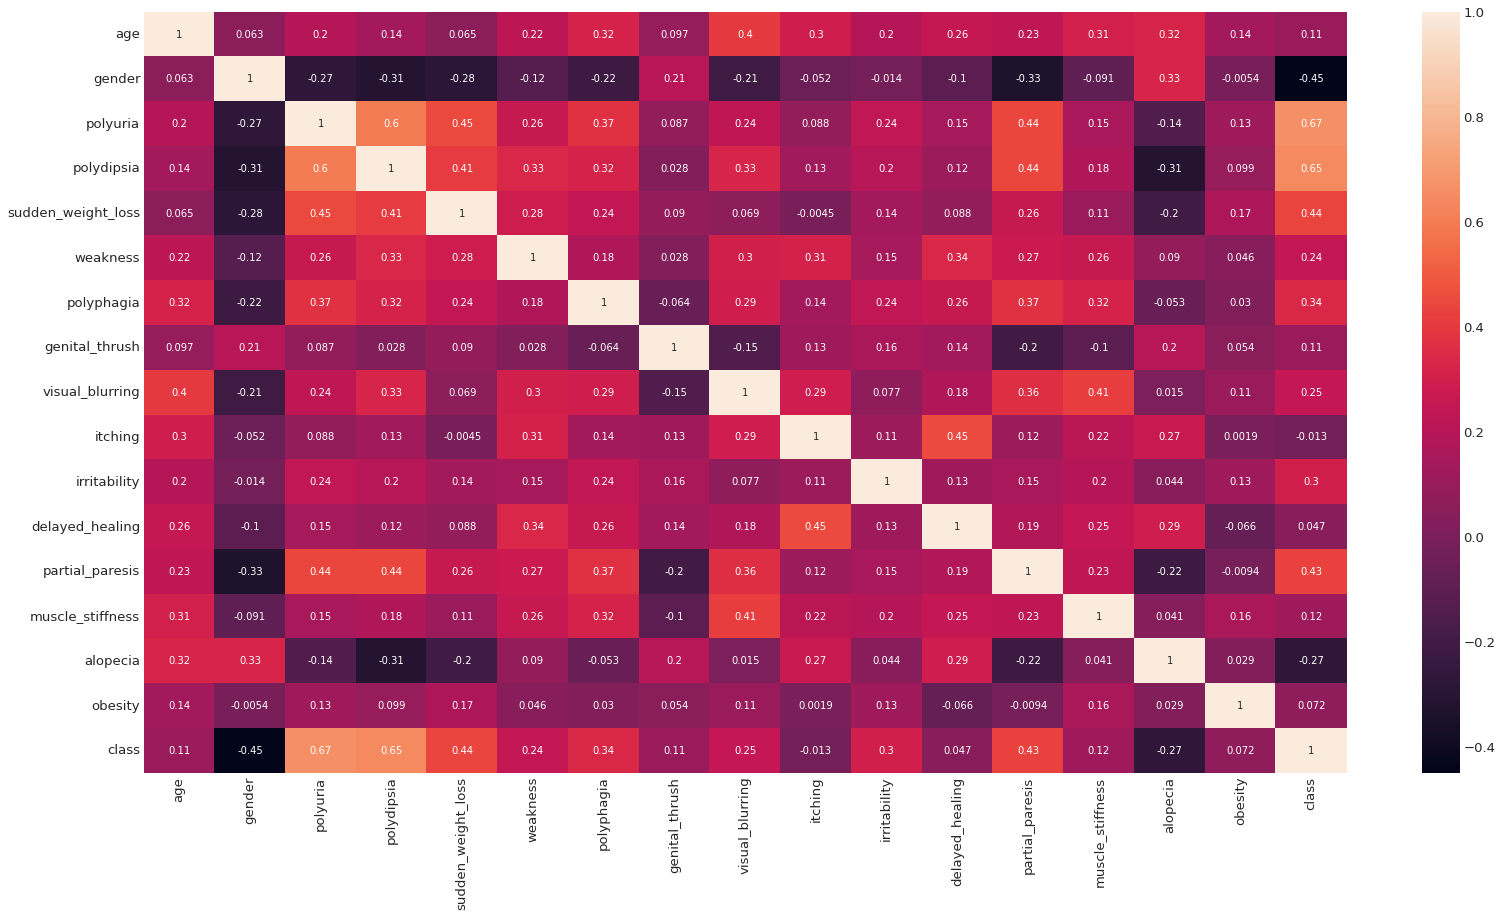

In [6]:
# let's make a correlation matrix
plt.figure(figsize=(24, 14))
sns.heatmap(diabetes_data.corr(), annot=True);

In [7]:
diabetes_data.corr()['class'].sort_values(ascending=False) # the correlation

class                 1.000000
polyuria              0.665922
polydipsia            0.648734
sudden_weight_loss    0.436568
partial_paresis       0.432288
polyphagia            0.342504
irritability          0.299467
visual_blurring       0.251300
weakness              0.243275
muscle_stiffness      0.122474
genital_thrush        0.110288
age                   0.108679
obesity               0.072173
delayed_healing       0.046980
itching              -0.013384
alopecia             -0.267512
gender               -0.449233
Name: class, dtype: float64

In [8]:
# checking skewness value
# if value lies between -0.5 to 0.5  then it is normal otherwise skewed
skew_value = diabetes_data.skew().sort_values(ascending=False)
skew_value

obesity               1.769420
genital_thrush        1.334223
irritability          1.206305
alopecia              0.657608
muscle_stiffness      0.517893
sudden_weight_loss    0.336359
age                   0.329359
partial_paresis       0.280426
visual_blurring       0.209426
polydipsia            0.209426
polyphagia            0.178134
delayed_healing       0.162537
itching               0.054022
polyuria              0.015430
weakness             -0.352476
class                -0.475715
gender               -0.543509
dtype: float64

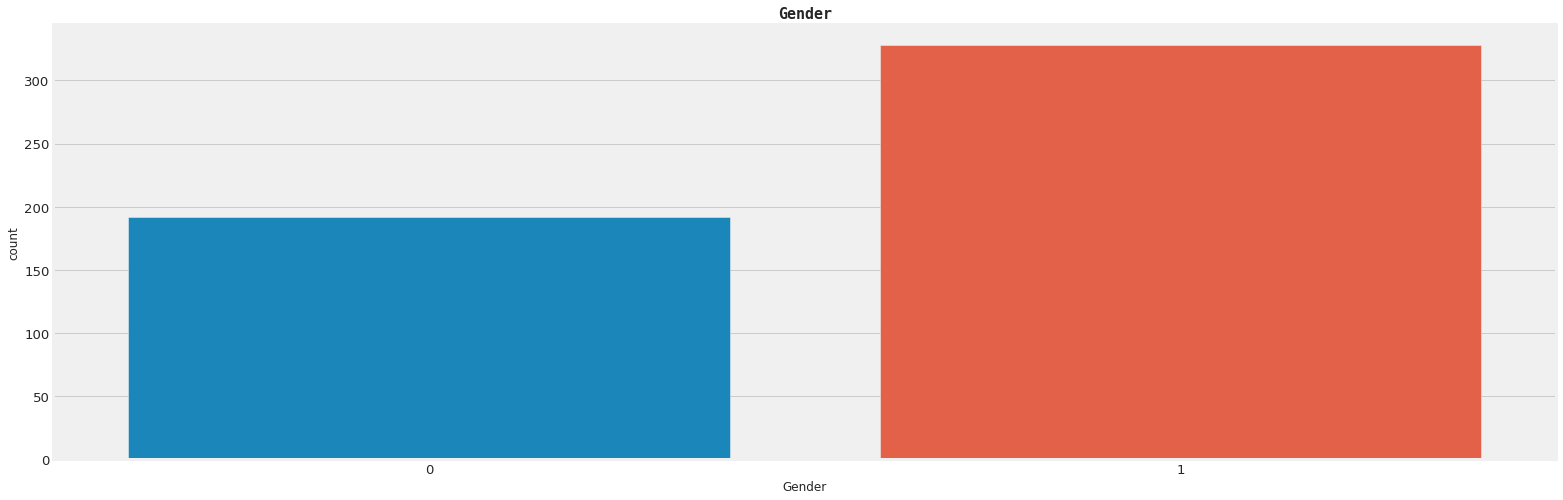

In [9]:
# let's plot it
plt.figure(figsize=(24, 8)) # figuring the size
# makes count plot 
sns.countplot(x='gender', data=diabetes_data)
# title
plt.title('Gender', fontname='monospace', fontweight='bold', fontsize=15)
# x-label
plt.xlabel('Gender');

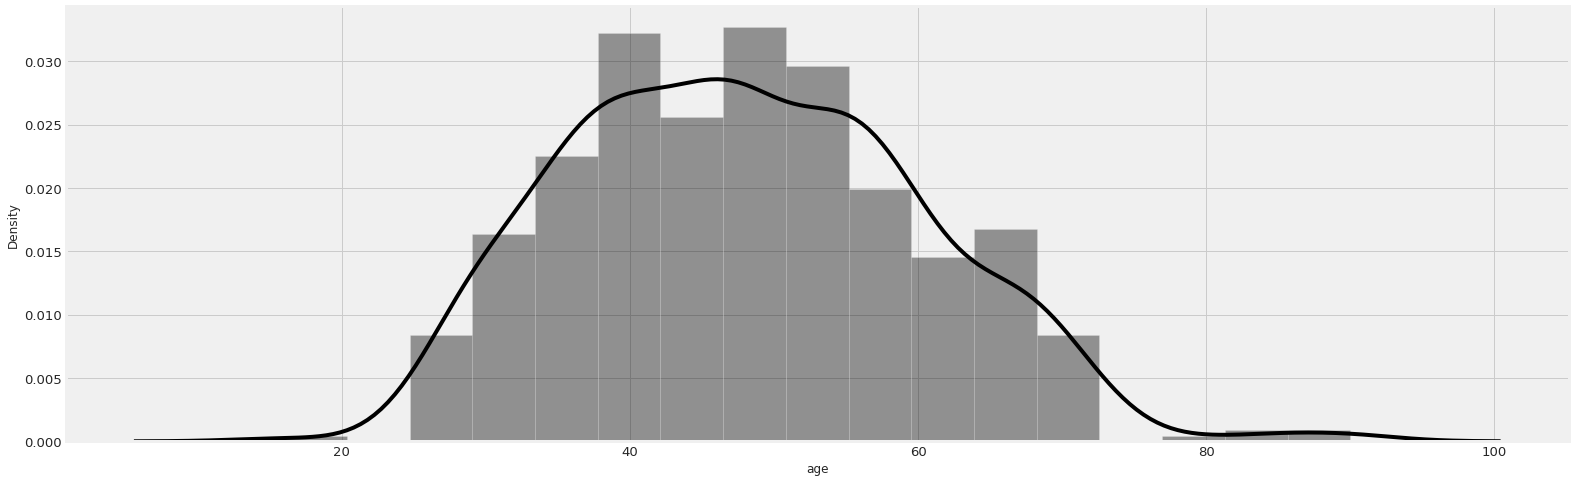

In [10]:
plt.figure(figsize=(24, 8))
sns.distplot(diabetes_data['age'], kde=True, color="black");

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Create X & y (features and label)
X = diabetes_data[diabetes_data.columns[:-1]]
y = diabetes_data[diabetes_data.columns[-1]]

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
scaled_X

array([[-0.6613669 ,  0.76509206, -0.99233705, ...,  1.29099445,
         1.38022749,  2.21564684],
       [ 0.82136224,  0.76509206, -0.99233705, ..., -0.77459667,
         1.38022749, -0.45133547],
       [-0.57899306,  0.76509206,  1.00772212, ...,  1.29099445,
         1.38022749, -0.45133547],
       ...,
       [ 0.82136224, -1.30703226,  1.00772212, ...,  1.29099445,
        -0.72451824,  2.21564684],
       [-1.32035762, -1.30703226, -0.99233705, ..., -0.77459667,
         1.38022749, -0.45133547],
       [-0.49661921,  0.76509206, -0.99233705, ..., -0.77459667,
        -0.72451824, -0.45133547]])

In [12]:
#Here split our data into train_test datasets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)
print(X_train)
print(y_train)

input_shape = [X_train.shape[1]]
print("Input shape: {}".format(input_shape))

     age  gender  polyuria  polydipsia  sudden_weight_loss  weakness  polyphagia  genital_thrush  \
434   53       1         1           1                   1         1           1               0   
436   41       1         1           1                   1         1           1               1   
208   54       1         0           0                   1         1           0               1   
332   50       0         0           0                   0         1           0               0   
220   38       1         0           0                   0         0           0               0   
..   ...     ...       ...         ...                 ...       ...         ...             ...   
71    35       0         0           1                   1         1           0               0   
106   58       1         0           1                   1         1           1               0   
270   40       0         1           1                   1         1           0               0   


In [13]:
# Set the random seed
tf.random.set_seed(42)

def model():
    # Create the model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation="relu", input_shape=input_shape, name="input_1"),
        tf.keras.layers.Dropout(rate=0.3),
        tf.keras.layers.Dense(128, activation="relu", name="input_2"),
        tf.keras.layers.Dropout(rate=0.3),
        tf.keras.layers.Dense(1, activation="sigmoid", name="output_layer")
    ], name="our_model")

    # Compile the model
    model.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=['accuracy'])
    
    return model

model = model()

# Fit the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=100,
    verbose=1,
)

Epoch 1/100
13/13 [==============================] - 2s 42ms/step - loss: 1.7053 - accuracy: 0.4832 - val_loss: 0.9530 - val_accuracy: 0.6827
Epoch 2/100
13/13 [==============================] - 0s 9ms/step - loss: 1.3462 - accuracy: 0.5553 - val_loss: 0.7416 - val_accuracy: 0.3365
Epoch 3/100
13/13 [==============================] - 0s 11ms/step - loss: 1.1772 - accuracy: 0.5409 - val_loss: 0.5293 - val_accuracy: 0.6827
Epoch 4/100
13/13 [==============================] - 0s 9ms/step - loss: 0.9855 - accuracy: 0.5649 - val_loss: 0.5084 - val_accuracy: 0.6827
Epoch 5/100
13/13 [==============================] - 0s 13ms/step - loss: 0.9370 - accuracy: 0.5889 - val_loss: 0.4796 - val_accuracy: 0.6827
Epoch 6/100
13/13 [==============================] - 0s 15ms/step - loss: 0.7889 - accuracy: 0.5986 - val_loss: 0.5532 - val_accuracy: 0.7692
Epoch 7/100
13/13 [==============================] - 0s 8ms/step - loss: 0.6947 - accuracy: 0.6298 - val_loss: 0.4581 - val_accuracy: 0.6827
Epoch 8/1

In [14]:
model.summary()

Model: "our_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (Dense)             (None, 128)               2176      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 input_2 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 output_layer (Dense)        (None, 1)                 129       
                                                                 
Total params: 18,817
Trainable params: 18,817
Non-trainable params: 0
_________________________________________________________________


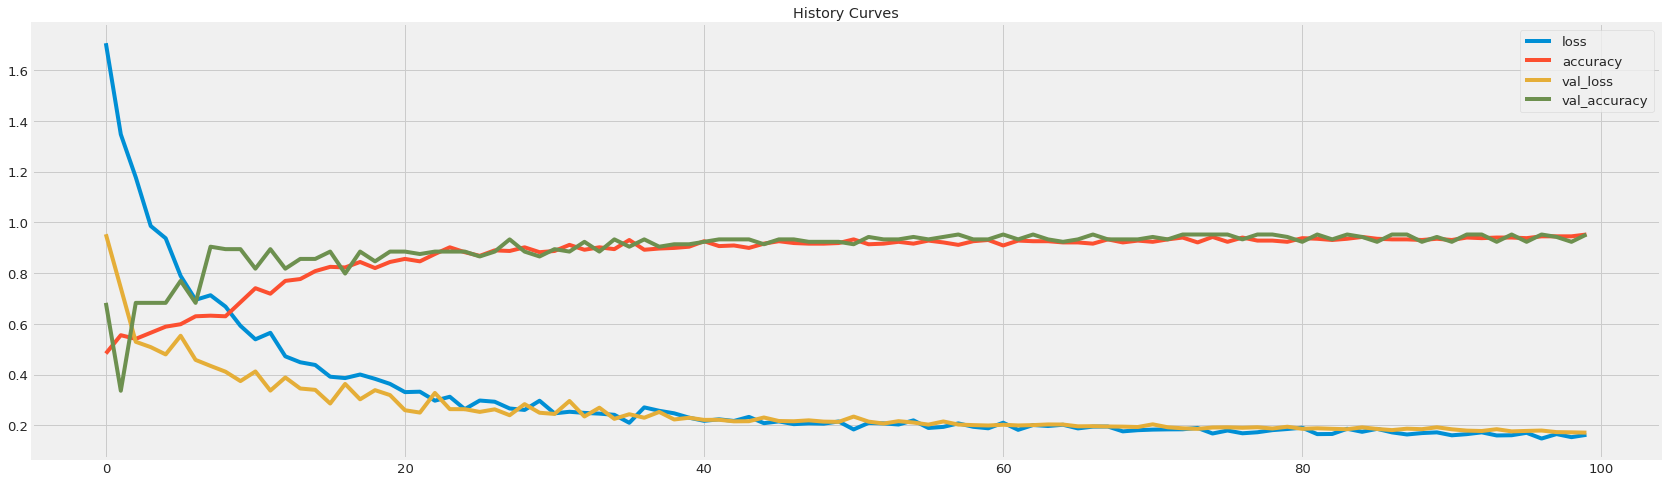

In [15]:
pd.DataFrame(history.history).plot(figsize=(26, 8), title="History Curves");

In [16]:
# Check kthe accuracy of our model
y_pred = model.predict(X_test)
loss, accuracy = model.evaluate(X_test, y_test)
print(f"y_pred: {y_pred[0]}")
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

4/4 [==============================] - 0s 4ms/step - loss: 0.1716 - accuracy: 0.9519
y_pred: [0.03712946]
Model loss on the test set: 0.17156587541103363
Model accuracy on the test set: 95.19%


In [17]:
y_pred = tf.round(y_pred)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[31,  2],
       [ 3, 68]])

In [18]:
A = [[40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1]]
B = [[32,0,0,1,0,1,0,0,1,1,0,1,0,0,1,0]]
C = [[32,1,0,1,1,1,0,1,1,0,0,1,0,1,1,0]]

In [19]:
data_baru = model.predict(A)
prediksi = (data_baru>0.5).tolist()
prediksi = prediksi[0]
hasil = data_baru.tolist()
hasil = hasil[0]
print("Diabetes") if prediksi[0] == True else print("Not Diabetes")
print(f"Data probability to diabetes: {(hasil[0]*100):.2f}%")

Not Diabetes
Data probability to diabetes: 9.81%


In [20]:
from tensorflow import keras,lite

In [21]:
keras_file = "model.h5"
tf.keras.models.save_model(model,keras_file)
converter = lite.TFLiteConverter.from_keras_model(model)
tfmodel = converter.convert()

open("model.tflite","wb").write(tfmodel)

INFO:tensorflow:Assets written to: /tmp/tmpbclu6qjn/assets


77108

In [22]:
import pickle 
pickle.dump(model,open('model.pkl','wb'))

INFO:tensorflow:Assets written to: ram://1247e98f-38c1-451d-9c91-1b788baaabef/assets


INFO:tensorflow:Assets written to: ram://1247e98f-38c1-451d-9c91-1b788baaabef/assets
